<a href="https://colab.research.google.com/github/cataa0/ADA-informes/blob/main/BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripcion del problema

## Problema del camino mas corto

El objetivo principal de este problema es poder encontrar el camino mas corto entre un nodo inicial y todos los nodos del grafo $G=(V,E)$.
Esto quiere decir que se busca la distancia mas corta entre el nodo inicial y el nodo buscado.

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.

# 2. Codigo

## 2.2 Codigo algoritmo Bellman Ford

### Generador de instancias

In [ ]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [34]:
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
from timeit import repeat
import numpy as np
import random
from termcolor import colored
from sys import maxsize
import networkx as nx

class Graph():
  def __init__(self, vertices):
    self.v = vertices   #vertices en el Grafo
    self.graph = []     #matriz de caminos entre vertices

  def add_edge(self, a, b, c):
    self.graph.append([a, b, c])

  def print_solution(self, distance): #Impresion de las distancias
    print("Distancias de cada nodo desde el inicial")
    for i in range(self.v):
      print("{0}\t\t{1}".format(i, distance[i]))

  def bellman_ford(self, src):
    #Inicializamos en infinito las distancias
    distance = [float("Inf")] * self.v
    distance[src] = 0
    #Se calcula las distancias hasta los v - 1, siendo v la cantidad total de nodos 
    for _ in range(self.v - 1):
      for a, b, c in self.graph:
        #Se calculan las distancias entre los nodos 
        if distance[a] != float("Inf") and distance[a] + c < distance[b]:
          distance[b] = distance[a] + c
    for a, b, c in self.graph:
      #Se verifica si existen ciclos negativos en el Grafo
      if distance[a] != float("Inf") and distance[a] + c < distance[b]:
        print("El Grafo contiene un ciclo negativo")
        return

    self.print_solution(distance)

def visualize_graph(lista_grafo, n):
    grafoNX = graph_to_nxdigraph(lista_grafo, n)
    pos = nx.circular_layout(grafoNX)
    labels = nx.get_edge_attributes(grafoNX, 'weight')

    nx.draw_networkx(grafoNX, pos)
    nx.draw_networkx_edge_labels(grafoNX, pos, edge_labels=labels)
    plt.show()

def graph_to_nxdigraph(graph: list, n: int):
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph


g = Graph(5)
g.add_edge(0, -1, 2)

g.add_edge(0, 2, 4)

g.add_edge(1, 1, 1)

g.add_edge(2, 4, 3)

g.add_edge(-2, -3, 4)

g.add_edge(2, 1, -5)
 
g.bellman_ford(0)



Distancias de cada nodo desde el inicial
0		0
1		-1
2		4
3		inf
4		2


## Algoritmo Dijkstra

In [ ]:
import sys
 
class Graph():
  #Se inicializan los nodos
  def __init__(self, vertx):
    self.V = vertx
    self.graph = [[0 for column in range(vertx)]
                   for row in range(vertx)]

  #Se imprime la solucion                 
  def pSol(self, dist):
    print("Distancia de cada nodo desde el inical")
    for node in range(self.V):
      print(node,"       " ,dist[node])
 
  #Calculamos la distancia minima entre el nodo visitado y el siguiente nodo
  def minDistance(self, dist, sptSet):
    min = sys.maxsize
    for v in range(self.V):
      if dist[v] < min and sptSet[v] == False:
          min = dist[v]
          min_index = v
 
    return min_index

  def dijkstra(self, source):
    dist = [sys.maxsize] * self.V
    dist[source] = 0
    sptSet = [False] * self.V
    for cout in range(self.V):
      u = self.minDistance(dist, sptSet)
      sptSet[u] = True
      for v in range(self.V):
        if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
          dist[v] = dist[u] + self.graph[u][v]
    self.pSol(dist)

g = Graph(5)
g.graph = [[0, 4, 1, 3, 2, 0],
           [2, 1, 8, 5, 0, 0],
           [0, 7, 2, 3, 6, 4],
           [2, 0, 1, 3, 6, 1],
           [1, 0, 6, 4, 0, 1],
           ]
 
g.dijkstra(0)

Distancia de cada nodo desde el inical
0         0
1         4
2         1
3         3
4         2


# 3. Descripcion del algoritmo 

Paso 1: Se inicializan todas las distancias de los nodos como infinito excepto el nodo inicial el cual le ponemos 0.

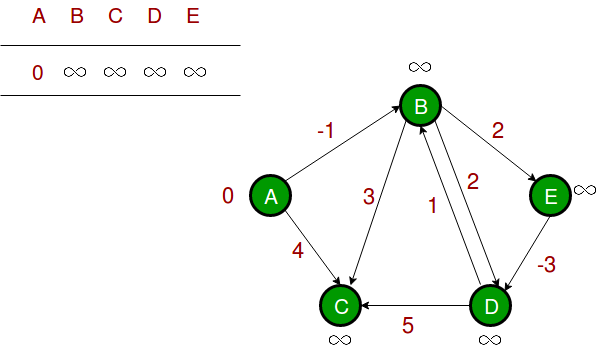

Paso 2: Se crea una matriz con los valores de las distancias de los nodos inicializados.

Paso 3: Se calculo el camino mas corto entre los nodos, partiendo por el nodo inicial con **V - 1**, siendo **V** los vertices totales que se encuentran en el grafo 

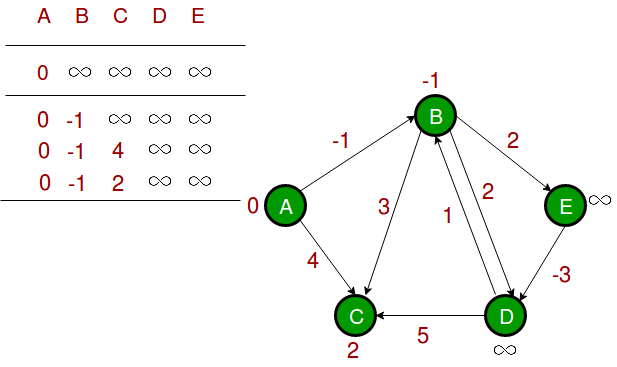

Paso 4: **Si dist[v] > dist[u] + peso del borde uv**, actualice **dist[v] a
dist[v] = dist[u] + peso de la arista uv**, el primer if nos ayuda si es que hay algun ciclo negativo dentro del grafo.

Paso 5: En la matriz vamos colocando las distancias entre los nodos y vamos viendo cual es el mas corto, finalmente nos arroja el camino mas corto entre todos los nodos.

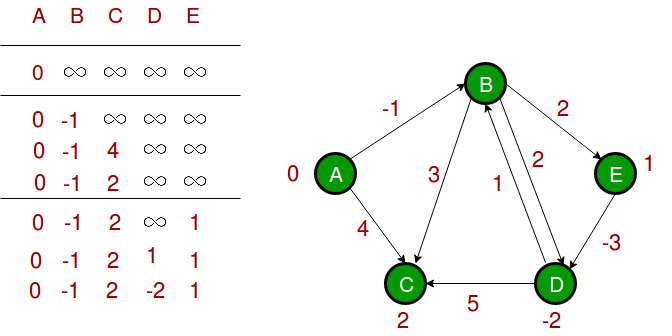

#4. Correctitud

Para poder probar que el algoritmo de Bellman-Ford funciona, utilizaremos **inducción matemática**, donde:

1. Probar $P(n)$ para un caso base, por ejemplo $P(1)$.
2. Probar que si $P(m)$ es cierto, donde $m<n$, entonces $P(n)$ también lo es.

**Teorema:** Sea G un grafo (orientado o no) sin circuitos negativos y $s ∈ V$ un nodo de origen. Al comenzar la k-ésima iteración, el algoritmo de Bellman-Ford determina un camino mínimo de a lo más k − 1 aristas de $s$ a los nodos de G.

> **Caso Base:** ($k = 1$) Los camino mínimos de longitud cero desde $s$ son los que van a $s$ y a los nodos no alcanzables desde $s$. Luego el lema vale trivialmente por cómo se inicializaron los valores de ϵ.
>
> **Paso inductivo:** Supongamos que el lema vale para algún $k ≥ 1$ y veamos que vale para $k+1$. Sea el comienzo de la k-ésima iteración y sea $v ϵ V$. Si existe un camino mínimo de a lo más $k-1$ aristas a $v$, por hipótesis inductiva, el algoritmo ya lo determinó. Supongamos ahora que los camino mínimo a $v$ tienen exactamente $k$ aristas y sea $P$ uno de ellos y $(u,v)$ la última arista de $P$. Por subestructura óptim de camino mínimo, $P' = P -(u,v)$ es un camino mínimo a $u$. Luego, por hipótesis inductiva, $ϵ(u)= 𝝳(s,u) + w(u,v) = w(P) = 𝝳(s,v)$.

#5. Tiempo de ejecucion

- En primer lugar, se realiza el paso de inicialización ⇒ O(V)

- Luego, el algoritmo itera $|V| - 1$ los tiempos con cada iteración ⇒ O(1)

- Después de $|V| - 1$ de las interacciones. el algoritmo elige todas las aristas y luego llama la función Relax(). Elegir todos los bordes lleva tiempo más la función Relax() ⇒ O(1) + O(E)

En **conclusión**, la complejidad para hacer todas la operaciones del algoritmo lleva un tiempo de **O(VE)**


# Experimentos

##Comparacion Dijksta y BellmanFord

In [41]:

x = []; y1=[]; y2= []

for n in range(5,100):
    g = Graph(5)
    g.add_edge(0, -1, 2)

    g.add_edge(0, 2, 4)

    g.add_edge(1, 1, 1)

    g.add_edge(2, 4, 3)

    g.add_edge(-2, -3, 4)

    g.add_edge(2, 1, -5)

    t1 = repeat(setup = "from __main__ import bellman_ford", stmt = g.bellman_ford(0), number = 10, repeat = 1)
    t2 = repeat(setup = "from __main__ import dijkstra", stmt = g.dijkstra(0), number = 10, repeat = 1)
    x.append(n)
    y1.append(t1)
    y2.append(t2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["BellmanFord", "Dijsktra"])

Distancias de cada nodo desde el inicial
0		0
1		-1
2		4
3		inf
4		2


ValueError: ignored

Experimento con instancias

In [44]:
x=[]; y=[]

for n in range(5,100):
  cont = [0]
  g = Graph(n)
  g.graph= instance_generator(n)

  t = repeat(setup = "from __main__ import bellman_ford", stmt = g.bellman_ford(0), number = 25, repeat = 10)
  sum = 0
  for i in range(len(t)):
    sum += t[i]

  prom = sum/25
  x.append(n)
  y.append(prom)


plt.plot(x,y)
plt.legend(["BellmanFord"])

plt.xlabel('Nodos en el Grafo')
plt.ylabel('Tiempo de ejecucion')
plt.show()
     

ValueError: ignored